<a href="https://colab.research.google.com/github/ingmax98/Clase-de-Herramientas/blob/master/Clase_4_mineria_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sn

dataset='https://raw.githubusercontent.com/jfloresbar/Mineria_de_Datos/master/countries.csv'
data=pd.read_csv(dataset,sep=';')
data



,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,NaN,AN,3041565,ca,Andorra,"ES,FR",20,376,84000,AD###,^(?:AD)*(\d{3})$,.ad
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,NaN,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,"SA,OM",784,971,4975593,NaN,NaN,.ae
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,NaN,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",4,93,29121286,NaN,NaN,.af
3,AG,ATG,443.0,St. John's,NaN,XCD,Dollar,NaN,AC,3576396,en-AG,Antigua and Barbuda,NaN,28,+1-268,86754,NaN,NaN,.ag
4,AI,AIA,102.0,The Valley,NaN,XCD,Dollar,NaN,AV,3573511,en-AI,Anguilla,NaN,660,+1-264,13254,NaN,NaN,.ai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,ZA,ZAF,1219912.0,Pretoria,AF,ZAR,Rand,NaN,SF,953987,"zu,xh,af,nso,en-ZA,tn,st,ts,ss,ve,nr",South Africa,"ZW,SZ,MZ,BW,NA,LS",710,27,49000000,####,^(\d{4})$,.za
248,ZM,ZMB,752614.0,Lusaka,AF,ZMW,Kwacha,NaN,ZA,895949,"en-ZM,bem,loz,lun,lue,ny,toi",Zambia,"ZW,TZ,MZ,CD,NA,MW,AO",894,260,13460305,#####,^(\d{5})$,.zm
249,ZW,ZWE,390580.0,Harare,AF,ZWL,Dollar,NaN,ZI,878675,"en-ZW,sn,nr,nd",Zimbabwe,"ZA,MZ,BW,ZM",716,263,13061000,NaN,NaN,.zw
250,CS,SCG,102350.0,Belgrade,EU,RSD,Dinar,NaN,YI,8505033,"cu,hu,sq,sr",Serbia and Montenegro,"AL,HU,MK,RO,HR,BA,BG",891,381,10829175,#####,^(\d{5})$,.cs


In [7]:
print (data.isnull().sum())
print(f'Cantidad de filas y columnas{data.shape}')

alpha_2                  1
alpha_3                  0
area                     0
capital                  6
continent               42
currency_code            1
currency_name            1
eqivalent_fips_code    251
fips                     3
geoname_id               0
languages                3
name                     0
neighbours              87
numeric                  0
phone                    5
population               0
postal_code_format      98
postal_code_regex      100
tld                      2
dtype: int64
Cantidad de filas y columnas(252, 19)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   alpha_2              251 non-null    object 
 1   alpha_3              252 non-null    object 
 2   area                 252 non-null    float64
 3   capital              246 non-null    object 
 4   continent            210 non-null    object 
 5   currency_code        251 non-null    object 
 6   currency_name        251 non-null    object 
 7   eqivalent_fips_code  1 non-null      object 
 8   fips                 249 non-null    object 
 9   geoname_id           252 non-null    int64  
 10  languages            249 non-null    object 
 11  name                 252 non-null    object 
 12  neighbours           165 non-null    object 
 13  numeric              252 non-null    int64  
 14  phone                247 non-null    object 
 15  population           252 non-null    int

##SEGUNDO DATA BASE

In [9]:
url2= 'https://raw.githubusercontent.com/jfloresbar/Mineria_de_Datos/master/countries2.csv'
data2=pd.read_csv(url2)
data2

,country,year,population
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460
...,...,...,...
1699,Zimbabwe,1987,9216418
1700,Zimbabwe,1992,10704340
1701,Zimbabwe,1997,11404948
1702,Zimbabwe,2002,11926563


In [12]:
data2_spain=data2[data2["country"]=='Spain']
data2_spain.head(20)

,country,year,population
1416,Spain,1952,28549870
1417,Spain,1957,29841614
1418,Spain,1962,31158061
1419,Spain,1967,32850275
1420,Spain,1972,34513161
1421,Spain,1977,36439000
1422,Spain,1982,37983310
1423,Spain,1987,38880702
1424,Spain,1992,39549438
1425,Spain,1997,39855442


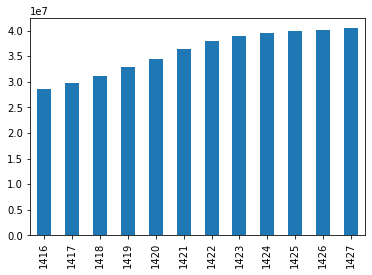

In [13]:
data2_spain.drop(['country'],axis=1)['population'].plot(kind='bar')

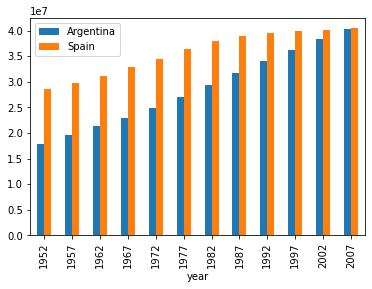

In [17]:
data2_ar=data2[data2['country']=='Argentina']

years=data2_ar['year']#Add years column as a list

pob_ar=data2_ar['population'].values
pob_spain=data2_spain['population'].values

data2_plot=pd.DataFrame({'Argentina':pob_ar,'Spain':pob_spain},index=years) #index function inside of dataframe selected from years list
data2_plot.plot(kind='bar')

#TRANSFORMACIONES DE DATOS

###Atributo y clase
**Arrays**

In [ ]:
url='https://raw.githubusercontent.com/DVidana/ESP/master/pima-indians-diabetes.csv'
names=['Preg','Plas','Ples','Skin','Test','Mass','Pedi','Age','Class']
data=pd.read_csv(url,names=names)
data

array=data.values

atributos=array[:,0:8]
clase=array[:,8]

#atributos
#clase


**Escalamiento**


In [29]:
#Escalamiento sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler
Escalamiento=MinMaxScaler(feature_range=(0,1))
Reescalamiento=Escalamiento.fit_transform(atributos)
np.set_printoptions(precision=2) #numero de decimales que apareceran en la impresion
print(names) #imprime los nombres
print(Reescalamiento)




['Preg', 'Plas', 'Ples', 'Skin', 'Test', 'Mass', 'Pedi', 'Age', 'Class']
[[0.35 0.74 0.59 ... 0.5  0.27 0.48]
 [0.06 0.43 0.54 ... 0.4  0.15 0.17]
 [0.47 0.92 0.52 ... 0.35 0.29 0.18]
 ...
 [0.29 0.61 0.59 ... 0.39 0.11 0.15]
 [0.06 0.63 0.49 ... 0.45 0.15 0.43]
 [0.06 0.47 0.57 ... 0.45 0.14 0.03]]


**Estandarizacion**

In [31]:
from sklearn.preprocessing import StandardScaler
Escalamiento=StandardScaler().fit(atributos)
Reescalamiento2=Escalamiento.transform(atributos)

print(Reescalamiento2)

[[ 0.64  0.85  0.15 ...  0.2   0.58  1.43]
 [-0.84 -1.12 -0.16 ... -0.68 -0.23 -0.19]
 [ 1.23  1.94 -0.26 ... -1.1   0.72 -0.11]
 ...
 [ 0.34  0.    0.15 ... -0.74 -0.54 -0.28]
 [-0.84  0.16 -0.47 ... -0.24 -0.23  1.17]
 [-0.84 -0.87  0.05 ... -0.2  -0.33 -0.87]]


##EJEMPLO INDIANS DIABETES SIN ESCALAR DATOS
**CAMBIAN LOS RANGOS DE LAS GRAFICAS**

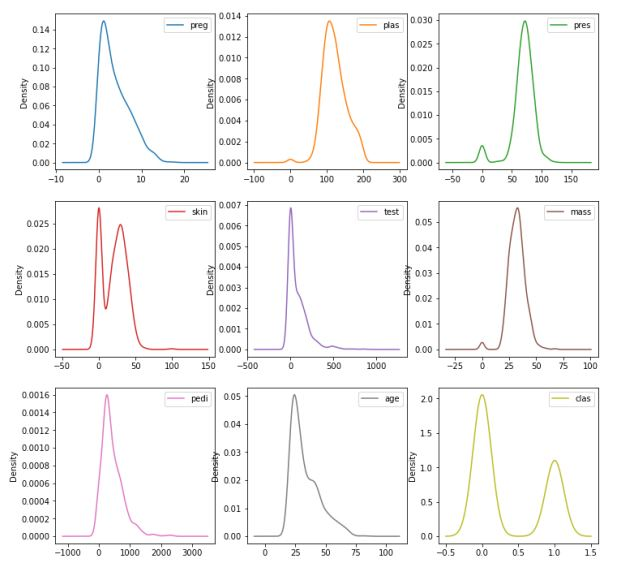

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f93a070f940>,
      dtype=object)

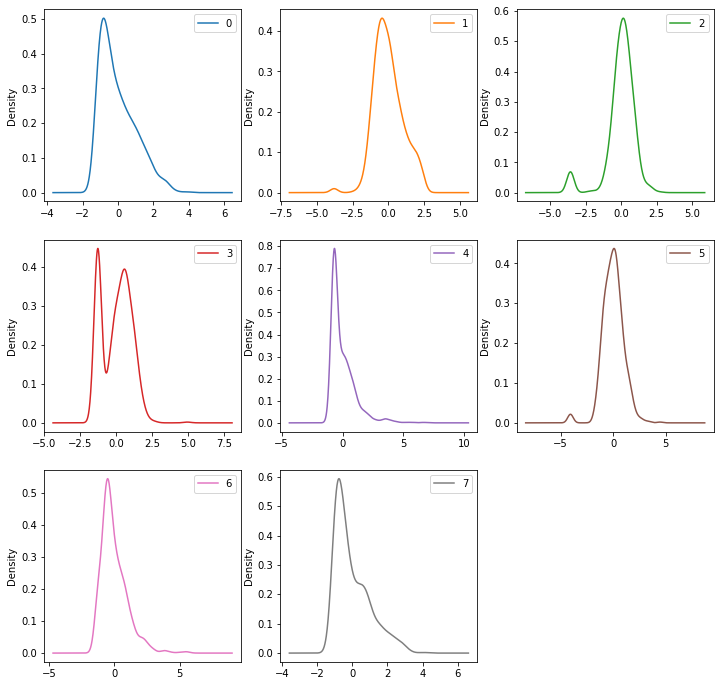

In [34]:
Trans_est=pd.DataFrame(Reescalamiento2)

Grafica_estandar=plt.figure(figsize=(12,12))
ax=Grafica_estandar.gca()
Trans_est.plot(ax=ax,kind='density',subplots=True,layout=(3,3))

**NORMALIZACION**


In [39]:
#Normalizacion
from sklearn.preprocessing import Normalizer
Escalamiento=Normalizer().fit(atributos)
Normalizacion=Escalamiento.transform(atributos)

print(Normalizacion)

[[0.01 0.23 0.11 ... 0.05 0.96 0.08]
 [0.   0.23 0.18 ... 0.07 0.95 0.08]
 [0.01 0.26 0.09 ... 0.03 0.96 0.05]
 ...
 [0.02 0.39 0.23 ... 0.09 0.8  0.1 ]
 [0.   0.33 0.16 ... 0.08 0.92 0.12]
 [0.   0.27 0.21 ... 0.09 0.93 0.07]]


#### LINK A MAS INFORMACION DE LAS FORMULAS DE ESTANDARIZACION

[INFORMACION SOBRE LOS DATOS DE NORMALIZACION Y ESTANDARIZACION](http://benalexkeen.com/feature-scaling-with-scikit-learn/)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f93a03ad978>,
      dtype=object)

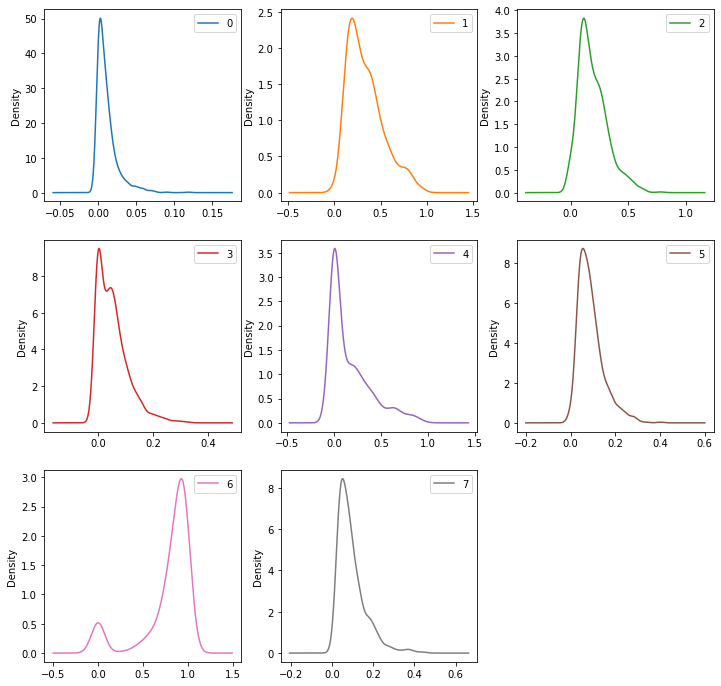

In [40]:
Trans_norm=pd.DataFrame(Normalizacion)

Grafica_estandar=plt.figure(figsize=(12,12))
ax=Grafica_estandar.gca()
Trans_norm.plot(ax=ax,kind='density',subplots=True,layout=(3,3))